In [1]:
# Importing the libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Importing libraries for NLP
import spacy
import re
from spacy.lang.en.stop_words import STOP_WORDS
import nltk

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('carbrands.csv')

In [3]:
df.head(10)

,Unnamed: 0,Rating,car_year,brand_name,date,review
0,0,5.0,2018,Audi,2018-07-11,BEST ALL AROUND PURPOSE CROSSOVER SUV I have n...
1,1,5.0,2018,Audi,2018-06-24,Best car This is a wonderful car. The technol...
2,2,5.0,2018,Audi,2018-05-02,Great Buy Do your home work
3,3,5.0,2018,Audi,2017-12-07,Fun Car Great ride. Loaded with technology. St...
4,4,5.0,2018,Audi,2017-10-25,Best luxury SUV w/ perfect comfort/sport balan...
5,5,5.0,2018,Audi,2017-10-14,Great car!!! Still new. Everything seems worki...
6,6,5.0,2018,Audi,2017-07-16,Exceptionally balanced vehicle Ive owned alot ...
7,7,4.0,2017,Audi,2018-04-22,"A rare find! I have owned a 2006 BMW X5, 4.4V8..."
8,8,5.0,2017,Audi,2017-03-21,What a Cayenne Turbo driver thinks of this car...
9,9,5.0,2017,Audi,2017-02-28,"Hold On Punch the gas and hold on, this baby w..."


In [4]:
# Overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31938 entries, 0 to 31937
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  31938 non-null  int64  
 1   Rating      31938 non-null  float64
 2   car_year    31938 non-null  int64  
 3   brand_name  31938 non-null  object 
 4   date        31938 non-null  object 
 5   review      31938 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.5+ MB


In [5]:
# Removing unnecessary columns
df = df.drop(["Unnamed: 0"], axis=1)

In [6]:
# Changing the decimal point of Rating column
df['Rating'] = df['Rating'].apply(lambda x: round(x, 0))

In [7]:
# Number of rows and columns
df.shape
print(f'There are {df.shape[1]} columns and {df.shape[0]} rows in the dataset')

There are 5 columns and 31938 rows in the dataset


In [8]:
# Finding missing values
df.isnull().sum()

Rating        0
car_year      0
brand_name    0
date          0
review        0
dtype: int64

#### There are no missing values

5.0    21542
4.0     7133
3.0     1954
2.0      885
1.0      424
Name: Rating, dtype: int64


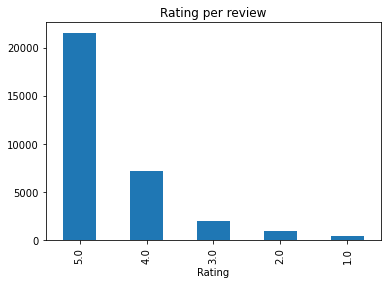

In [9]:
# Calculate star rating of review
star_rating = df["Rating"].value_counts()
print(star_rating)

# Plot distribution
star_rating.plot.bar()
plt.title("Rating per review")
plt.xlabel("Rating")
plt.show()

#### The highest rating is 5.0, while the lowest rating is 1.0

In [10]:
# Assigning sentiment based on ratings
import numpy as np

def sentiment_categorization(Rating):

    

    if Rating < 3:

        return "negative" # negative sentiment

    elif Rating > 3:

        return "positive" # positive sentiment

    else:

        return "neutral" # neutral sentiment

df['Sentiment'] = df['Rating'].apply(sentiment_categorization)

In [11]:
# Print sentiment distribution
df["Sentiment"].value_counts()

positive    28675
neutral      1954
negative     1309
Name: Sentiment, dtype: int64

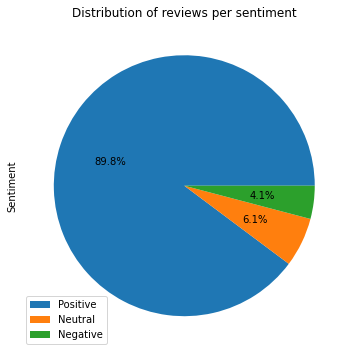

In [12]:
# Sentiment review distribution
df['Sentiment'].value_counts().plot.pie(figsize=(6,6),title="Distribution of reviews per sentiment",labels=['', ' ', ''],autopct='%1.1f%%')
labels=["Positive", "Neutral", "Negative"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')

#### Positive sentiment is greater with 89.8% followed by neutral sentiment with 6.1% which negative sentiment the least with 4.1% showing a positive response to the cars.

In [13]:
len_df = pd.concat([df.loc[:,"review"].map(lambda x:len(x)),df.loc[:,"Sentiment"]],axis=1)
print("Average positive review length:", len_df.loc[len_df["Sentiment"]== "positive","review"].mean())
print("Average neutral review length:", len_df.loc[len_df["Sentiment"]== "neutral","review"].mean())
print("Average negative review length:", len_df.loc[len_df["Sentiment"]== "negative","review"].mean())

Average positive review length: 470.8609241499564
Average neutral review length: 645.878198567042
Average negative review length: 801.9190221543163


#### Negative reviews tend to have the most average review length, followed closely by neutral reviews, with positive sentiment reviews having the least average review length.

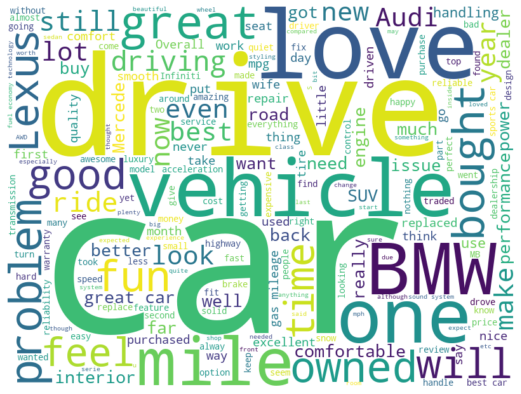

In [14]:
# Wordcloud of reviews
text = " ".join(df['review'].tolist())

wordcloud = WordCloud(width=800, height=600, background_color="white").generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

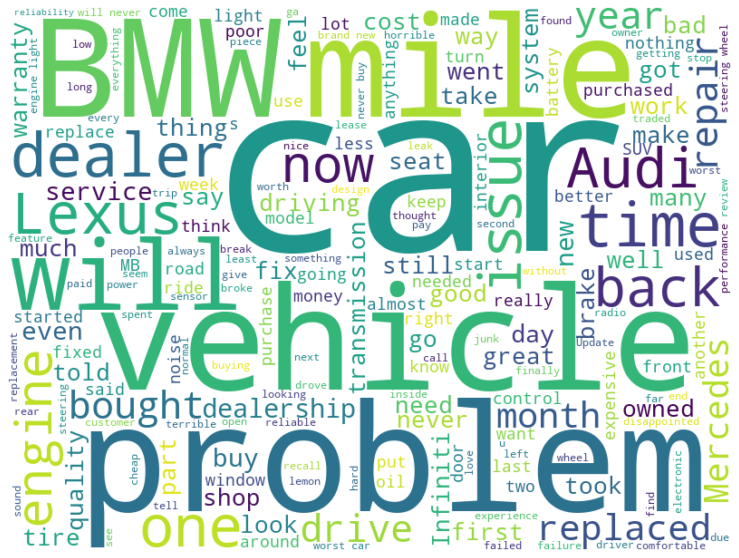

In [15]:
# Wordcloud of negative sentiment review
consolidated = ' '.join(word for word in df['review'][df['Sentiment'] == 'negative'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=600, background_color="white")

# Set up the figure size
plt.figure(figsize=(15, 10))

# Generate and display the word cloud
plt.imshow(wordcloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

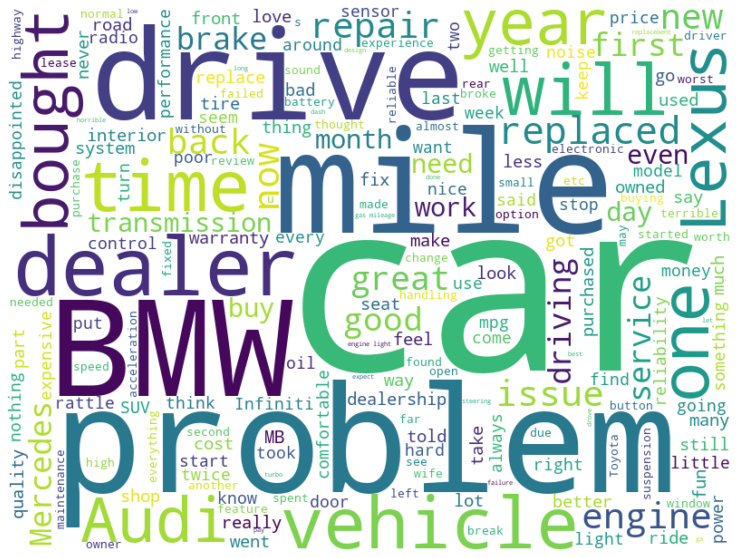

In [16]:
# Wordcloud of neutral sentiment review
consolidated = ' '.join(word for word in df['review'][df['Sentiment'] == 'neutral'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=600, background_color="white")

# Set up the figure size
plt.figure(figsize=(15, 10))

# Generate and display the word cloud
plt.imshow(wordcloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

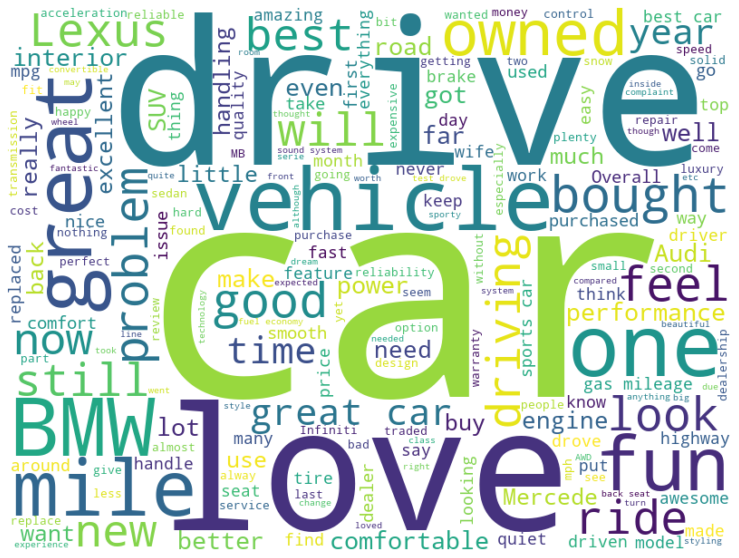

In [17]:
# Wordcloud of positive sentiment review
consolidated = ' '.join(word for word in df['review'][df['Sentiment'] == 'positive'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=600, background_color="white")

# Set up the figure size
plt.figure(figsize=(15, 10))

# Generate and display the word cloud
plt.imshow(wordcloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
# Clean the text
def clean_text(Review):
    # Convert text to lowercase
    Review = str(Review).lower()  
    # Remove words enclosed in square brackets
    Review = re.sub('\[.*?\]', '', Review)
    # Remove words enclosed in angle brackets
    Review = re.sub('<.*?>+', '', Review)
    # Remove hyperlinks and URLs
    Review = re.sub('https?://\S+|www\.\S+', '', Review)
    # Remove numbers
    Review = re.sub(r'[^a-z0-9\s]', '', Review)
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    return Review
# Clean entire dataset
df['clean_review'] = df['review'].apply(clean_text)

In [19]:
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [20]:
#clean stopwords
stopword = set(stopwords.words('english'))
def clean_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in stopword) 
    return text
   
df['review_sw'] = df['clean_review'].apply(clean_stopwords)

In [21]:
# Loading Spacy small model as nlp
nlp = spacy.load("en_core_web_sm")

In [22]:
# Lemmatization
def lemmatization (text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(tokens)

# Apply lemmatization function
df['review_cleaned'] = df['review_sw'].apply(lemmatization)

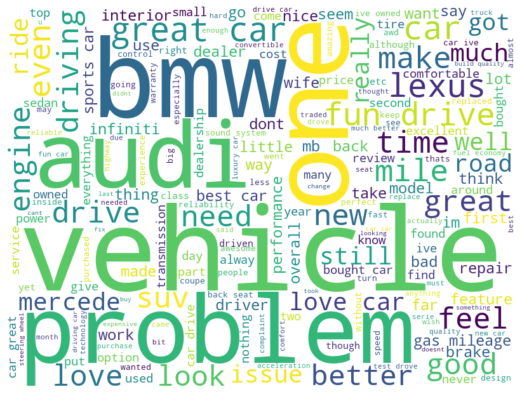

In [23]:
# Word cloud of the cleaned review
text = " ".join(df['review_sw'].tolist())

wordcloud = WordCloud(width=800, height=600, background_color="white").generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

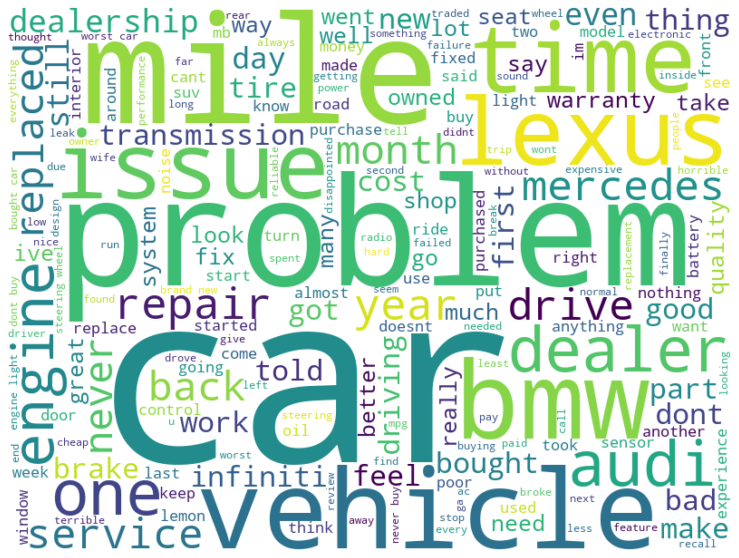

In [24]:
# Wordcloud of negative cleaned sentiment review
consolidated = ' '.join(word for word in df['review_sw'][df['Sentiment'] == 'negative'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=600, background_color="white")

# Set up the figure size
plt.figure(figsize=(15, 10))

# Generate and display the word cloud
plt.imshow(wordcloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

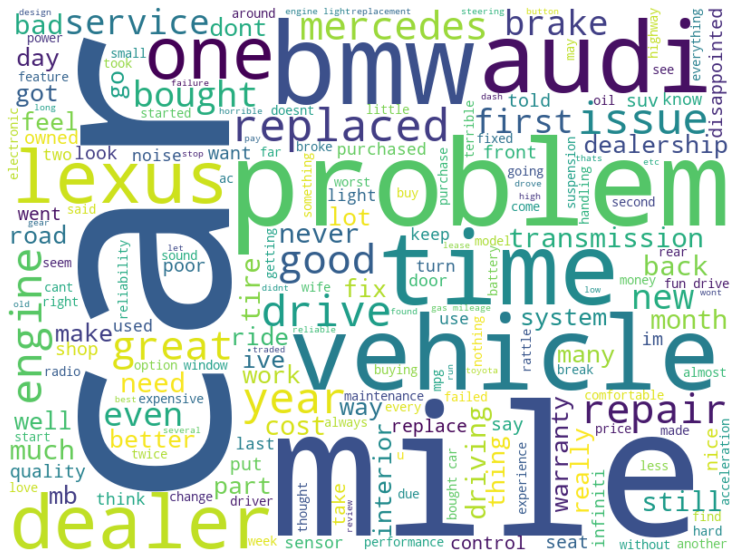

In [25]:
# Wordcloud of neutral cleaned sentiment review
consolidated = ' '.join(word for word in df['review_sw'][df['Sentiment'] == 'neutral'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=600, background_color="white")

# Set up the figure size
plt.figure(figsize=(15, 10))

# Generate and display the word cloud
plt.imshow(wordcloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

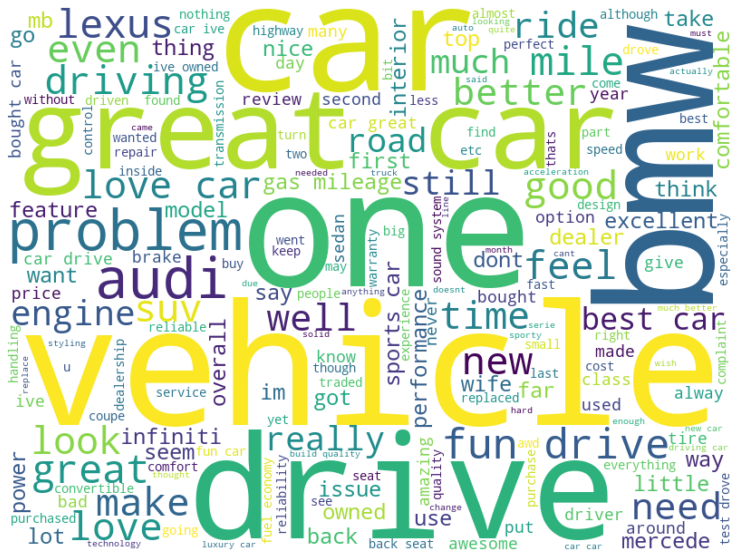

In [26]:
# Wordcloud of positive cleaned sentiment review
consolidated = ' '.join(word for word in df['review_sw'][df['Sentiment'] == 'positive'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=600, background_color="white")

# Set up the figure size
plt.figure(figsize=(15, 10))

# Generate and display the word cloud
plt.imshow(wordcloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()